## Prerequesites

In [2]:
from asreviewcontrib.visualization.plot import Plot
import os
import glob
from asreviewcontrib.statistics import StateStatistics

In [2]:
import h5py
import nexusformat.nexus as nx
import numpy as np
import datetime

In [3]:
def stats(file):
    print(StateStatistics.from_path(file))

## Study 3 - timing stats

In [4]:
# collect all files
files = glob.glob(os.path.join(r'simulation_output', '*.h5'), recursive=False)
files

['simulation_output\\lr_doc2vec.h5',
 'simulation_output\\lr_sbert.h5',
 'simulation_output\\lr_tf-idf.h5',
 'simulation_output\\nb_tf-idf.h5',
 'simulation_output\\nn-2-layer_doc2vec.h5',
 'simulation_output\\nn-2-layer_sbert.h5',
 'simulation_output\\power-cnn_wide-doc2vec.h5',
 'simulation_output\\rf_doc2vec.h5',
 'simulation_output\\rf_tf-idf.h5',
 'simulation_output\\svm_tfidf.h5']

In [5]:
# extract feature matrix training time
print("RRF@1%: ")

for file in files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(1, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@1.5%: ")

for file in files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(1.5, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@2%: ")

for file in files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(2, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@2.8%: ")

for file in files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(2.8, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

RRF@1%: 
simulation_output\lr_doc2vec.h5  :  (0, 31.0)
simulation_output\lr_sbert.h5  :  (0, 47.0)
simulation_output\lr_tf-idf.h5  :  (0, 45.0)
simulation_output\nb_tf-idf.h5  :  (0, 42.0)
simulation_output\nn-2-layer_doc2vec.h5  :  (0, 30.0)
simulation_output\nn-2-layer_sbert.h5  :  (0, 44.0)
simulation_output\power-cnn_wide-doc2vec.h5  :  (0, 30.0)
simulation_output\rf_doc2vec.h5  :  (0, 39.0)
simulation_output\rf_tf-idf.h5  :  (0, 24.0)
simulation_output\svm_tfidf.h5  :  (0, 38.0)
RRF@1.5%: 
simulation_output\lr_doc2vec.h5  :  (0, 38.0)
simulation_output\lr_sbert.h5  :  (0, 49.0)
simulation_output\lr_tf-idf.h5  :  (0, 49.0)
simulation_output\nb_tf-idf.h5  :  (0, 45.0)
simulation_output\nn-2-layer_doc2vec.h5  :  (0, 42.0)
simulation_output\nn-2-layer_sbert.h5  :  (0, 47.0)
simulation_output\power-cnn_wide-doc2vec.h5  :  (0, 39.0)
simulation_output\rf_doc2vec.h5  :  (0, 40.0)
simulation_output\rf_tf-idf.h5  :  (0, 32.0)
simulation_output\svm_tfidf.h5  :  (0, 48.0)
RRF@2%: 
simulation_

In [15]:
print("RRF@2.8%: ")

for file in files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(2.8, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

RRF@2.8%: 
simulation_output\lr_doc2vec.h5  :  (0, 44.0)
simulation_output\lr_sbert.h5  :  (0, 52.0)
simulation_output\lr_tf-idf.h5  :  (0, 52.0)
simulation_output\nb_tf-idf.h5  :  (0, 49.0)
simulation_output\nn-2-layer_doc2vec.h5  :  (0, 46.0)
simulation_output\nn-2-layer_sbert.h5  :  (0, 49.0)
simulation_output\power-cnn_wide-doc2vec.h5  :  (0, 47.0)
simulation_output\rf_doc2vec.h5  :  (0, 44.0)
simulation_output\rf_tf-idf.h5  :  (0, 46.0)
simulation_output\svm_tfidf.h5  :  (0, 48.0)


In [8]:
# extract feature matrix training time
print("wss@95%: ")

for file in files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.wss(95, x_format="percentage")[0].round(2))
    except:
        print(file + ' : ' + 'error')

wss@95%: 
simulation_output\lr_doc2vec.h5  :  90.93
simulation_output\lr_sbert.h5  :  94.21
simulation_output\lr_tf-idf.h5  :  94.14
simulation_output\nb_tf-idf.h5  :  92.81
simulation_output\nn-2-layer_doc2vec.h5  :  86.57
simulation_output\nn-2-layer_sbert.h5  :  93.01
simulation_output\power-cnn_wide-doc2vec.h5  :  92.34
simulation_output\rf_doc2vec.h5  :  88.14
simulation_output\rf_tf-idf.h5  :  91.82
simulation_output\svm_tfidf.h5  :  92.69


In [10]:
# extract feature matrix training time
print("feature extractor time: ")

for file in files:

    try:
        StateStatistics.from_path(file).analysis.wss(95)

        f = h5py.File(file, 'r')

        # find the creation time of the current iteration and the next iteration
        start = np.datetime64(f.get(f'results/{0}/').attrs['creation_time'])
        stop = np.datetime64(f.get(f'results/{1}/').attrs['creation_time'])
        duration = datetime.timedelta(seconds=((stop - start)) / np.timedelta64(1, 's'))
        
        print(file + ' : ' + str(duration))
    except:
        print(file + ' : ' + 'error')

feature extractor time: 
simulation_output\lr_doc2vec.h5 : 0:18:01.806463
simulation_output\lr_sbert.h5 : 6:27:23.235485
simulation_output\lr_tf-idf.h5 : 0:00:23.352766
simulation_output\nb_tf-idf.h5 : 0:00:13.620907
simulation_output\nn-2-layer_doc2vec.h5 : 0:18:03.919284
simulation_output\nn-2-layer_sbert.h5 : 6:58:30.895628
simulation_output\power-cnn_wide-doc2vec.h5 : 0:32:25.447846
simulation_output\rf_doc2vec.h5 : 0:15:42.613961
simulation_output\rf_tf-idf.h5 : 0:00:15.569852
simulation_output\svm_tfidf.h5 : 0:00:15.576340


In [7]:
break

# extract feature matrix training time
print("median iteration time: ")

for file in files:

    try:
        f = h5py.File(file, 'r')
    

        times = []

        for i in range(0, 2000):
            # find the creation time of the current iteration and the next iteration
            start = np.datetime64(f.get(f'results/{i}/').attrs['creation_time'])
            stop = np.datetime64(f.get(f'results/{i+1}/').attrs['creation_time'])
            duration = datetime.timedelta(seconds=((stop - start)) / np.timedelta64(1, 's'))
            
            # extract microseconds from the timedelta object
            times.append(duration)
        
        print(file + ' : ' + str(np.median(times)))
    except:
        print(file + ' : ' + 'error')

median iteration time: 
simulation_output\lr_doc2vec.h5 : 0:00:00.029964
simulation_output\lr_sbert.h5 : 0:00:00.193353
simulation_output\lr_tf-idf.h5 : 0:00:00.059982
simulation_output\nb_tf-idf.h5 : 0:00:00.037920
simulation_output\nn-2-layer_doc2vec.h5 : 0:00:01.754794
simulation_output\nn-2-layer_sbert.h5 : 0:00:02.798934
simulation_output\nn-2-layer_wide-doc2vec.h5 : 0:00:02.776180
simulation_output\power-cnn_wide-doc2vec.h5 : 0:00:59.175478
simulation_output\rf_doc2vec.h5 : 0:00:00.574183
simulation_output\rf_tf-idf.h5 : 0:00:02.457332
simulation_output\svm_tfidf.h5 : 0:00:08.955977


### Study 3 plots

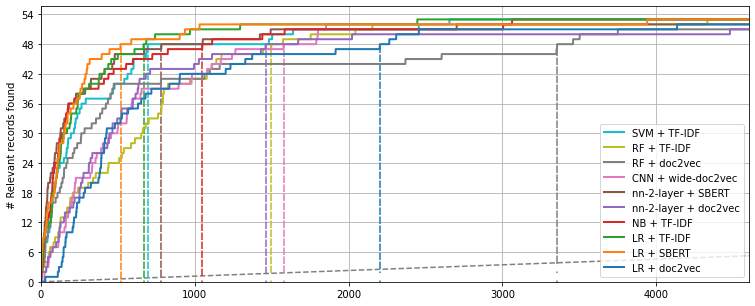

In [112]:
with Plot.from_paths(files[:]) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4600)
  #inc_plot.set_legend()
  inc_plot.ax.legend(["SVM + TF-IDF", "RF + TF-IDF", "RF + doc2vec", "CNN + wide-doc2vec", "nn-2-layer + SBERT","nn-2-layer + doc2vec", "NB + TF-IDF", "LR + TF-IDF", "LR + SBERT","LR + doc2vec"], loc='lower right')
  inc_plot.add_random(add_text=False)

  inc_plot.ax2.remove()
  inc_plot.ax3.remove()

  all_files = all(plot.is_file.values())
  for key in list(plot.analyses):
      if all_files or not plot.is_file[key]:
          inc_plot.add_wss(
              key, 90, add_value=True, add_text=False)

  inc_plot.fig.set_size_inches(12, 5, forward=True)

  inc_plot.show()
  inc_plot.save("plots\study-3-plot.png")

### Neural network runs

In [12]:
nn_simulations = [r'simulation_output\nn-2-layer_doc2vec.h5',
                  r'simulation_output\nn-2-layer_sbert.h5',
                  r'simulation_output\power-cnn_wide-doc2vec.h5',]

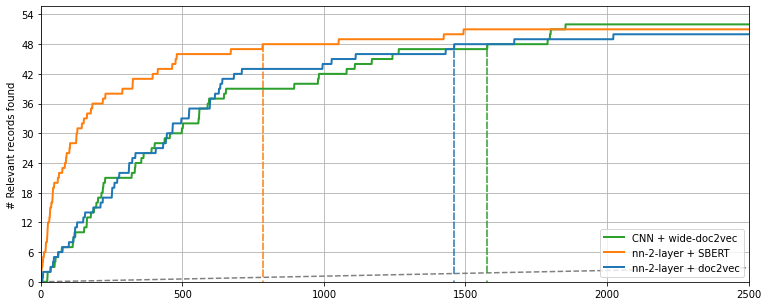

In [116]:
with Plot.from_paths(nn_simulations) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 2500)
  inc_plot.ax.legend(["CNN + wide-doc2vec", "nn-2-layer + SBERT", "nn-2-layer + doc2vec"], loc='lower right'), 
  inc_plot.add_random(add_text=False)

  inc_plot.ax2.remove()
  inc_plot.ax3.remove()

  all_files = all(plot.is_file.values())
  for key in list(plot.analyses):
      if all_files or not plot.is_file[key]:
          inc_plot.add_wss(
              key, 90, add_value=True, add_text=False)

  inc_plot.fig.set_size_inches(12, 5, forward=True)

  inc_plot.show()
  inc_plot.save("plots\study-3-nn-plot-90.png")

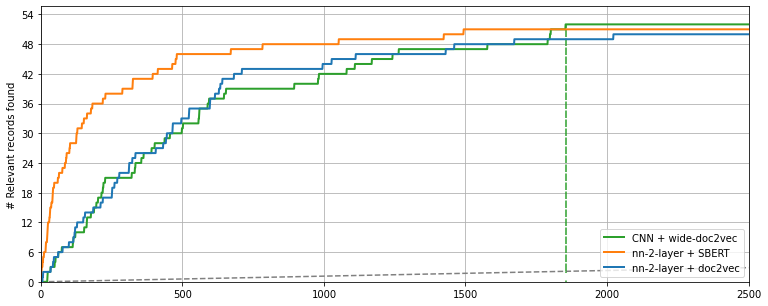

In [117]:
with Plot.from_paths(nn_simulations) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 2500)
  inc_plot.ax.legend(["CNN + wide-doc2vec", "nn-2-layer + SBERT","nn-2-layer + doc2vec"], loc='lower right')
  inc_plot.add_random(add_text=False)

  inc_plot.ax2.remove()
  inc_plot.ax3.remove()

  all_files = all(plot.is_file.values())
  for key in list(plot.analyses):
      if all_files or not plot.is_file[key]:
          inc_plot.add_wss(
              key, 98, add_value=True, add_text=False)

  inc_plot.fig.set_size_inches(12, 5, forward=True)

  inc_plot.show()
  inc_plot.save("plots\study-3-nn-plot-100.png")

## Study 4 - visualize switching plots

### NB runs

In [4]:
stats(r'simulation_output\nb_tf-idf.h5')

************  nb_tf-idf.h5  **************

-----------  general  -----------
Number of runs            : 1
Number of papers          : 46376
Number of included papers : 63
Number of excluded papers : 46313
Number of unlabeled papers: 0
Number of queries         : 3063

-----------  settings  -----------
data_name         : brouwer_clean
model             : nb
query_strategy    : max
balance_strategy  : double
feature_extraction: tfidf
n_instances       : 1
n_queries         : min
n_prior_included  : 10
n_prior_excluded  : 10
mode              : simulate
model_param       : {'alpha': 3.822}
query_param       : {}
feature_param     : {'ngram_max': 1, 'stop_words': 'english', 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

-----------    ATD    -----------
 0.00779

Time to discovery:

    row   : value
    27937 : 1.0
    26603 : 3.0
    11685 : 8.0
    13393 : 11.0
    43062 : 12.0
    28065 : 13.0
    30552 : 16.0
    12013 :

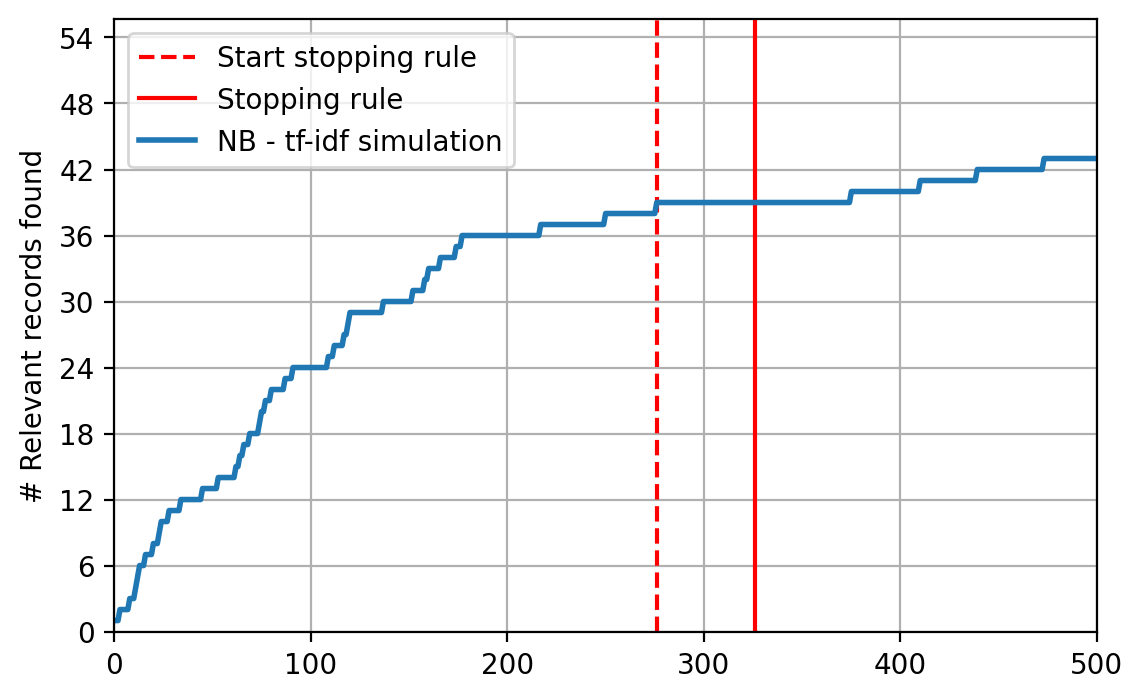

In [62]:
inc_plot = Plot.from_paths([r'simulation_output\nb_tf-idf.h5']).new("inclusion", result_format="number")
inc_plot.set_grid()
inc_plot.set_xlim(0, 500)
inc_plot.ax.axvline(x=276, color='red', linestyle='--')
inc_plot.ax.axvline(x=276+50, color='red')
inc_plot.ax.legend(["Start stopping rule", "Stopping rule", "NB - tf-idf simulation"], loc='upper left')

inc_plot.ax2.remove()
inc_plot.ax3.remove()

inc_plot.fig.set_dpi(200)

inc_plot.save(r"plots\study-4-nb-plot.png")

In [114]:
# Extract all records until stopping rule of 50
file = r'simulation_output\nb_tf-idf.h5'

f = h5py.File(file, 'r')
#fn = nx.nxload(file)

#print(fn.tree)

stopping_rule = 276+50+1

iteration = f.get(f'results/{stopping_rule}/train_idx')[:]

np.savetxt(f"simulation_states\\nb-records-{stopping_rule}.txt", iteration, fmt='%-10i', newline='')

In [12]:
nb_files = glob.glob(os.path.join(r'simulation_output/NB/', '*.h5'), recursive=False)
nb_files

['simulation_output/NB\\lr_doc2vec.h5',
 'simulation_output/NB\\lr_sbert.h5',
 'simulation_output/NB\\lr_tf-idf.h5',
 'simulation_output/NB\\nb_tf-idf.h5',
 'simulation_output/NB\\nn_doc2vec.h5',
 'simulation_output/NB\\nn_sbert.h5',
 'simulation_output/NB\\power-cnn_wide-doc2vec.h5',
 'simulation_output/NB\\rf_doc2vec.h5',
 'simulation_output/NB\\rf_tf-idf.h5',
 'simulation_output/NB\\svm_tf-idf.h5']

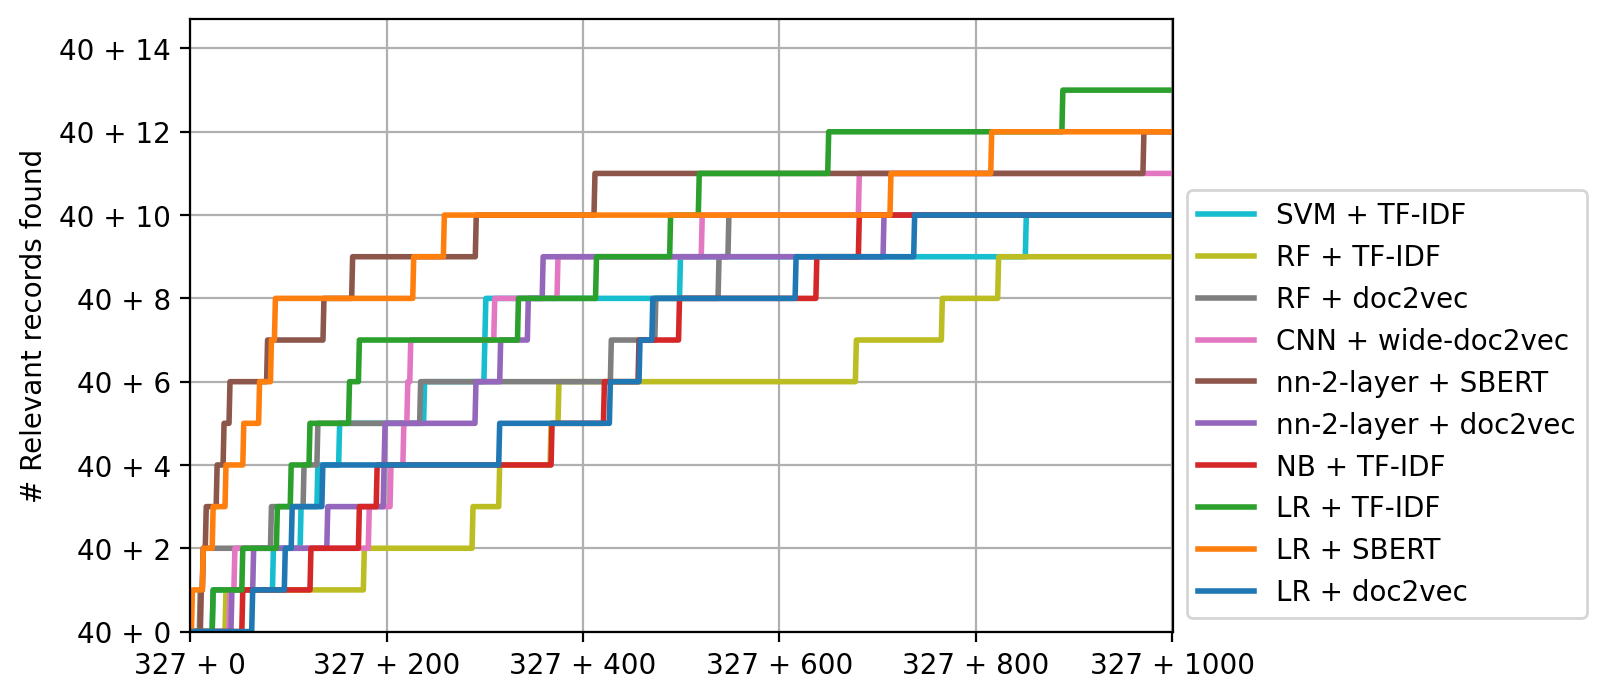

In [14]:
inc_plot = Plot.from_paths(nb_files).new("inclusion", result_format="number")
inc_plot.set_grid()
inc_plot.set_xlim(0, 1001)
inc_plot.ax.legend(["SVM + TF-IDF", "RF + TF-IDF", "RF + doc2vec", "CNN + wide-doc2vec","nn-2-layer + SBERT","nn-2-layer + doc2vec", "NB + TF-IDF", "LR + TF-IDF", "LR + SBERT","LR + doc2vec"], bbox_to_anchor=(1,0), loc="lower left")

inc_plot.ax2.remove()
inc_plot.ax3.remove()

inc_plot.ax.yaxis.set_major_formatter('40 + {x:1.0f}')
inc_plot.ax.xaxis.set_major_formatter('327 + {x:1.0f}')

inc_plot.fig.set_dpi(200)

inc_plot.save(r"plots\study-4-nb-runs.png")

327 to percentages is 0.705%, and 40 records were already known

In [5]:
# extract feature matrix training time
print("RRF@1%: ")

for file in nb_files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(1-0.705, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@1.5%: ")

for file in nb_files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(1.5-0.705, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@2%: ")

for file in nb_files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(2-0.705, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@3%: ")

for file in nb_files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(2.8-0.705, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

RRF@1%: 
simulation_output/NB\lr_doc2vec.h5  :  (0, 4.0)
simulation_output/NB\lr_sbert.h5  :  (0, 8.0)
simulation_output/NB\lr_tf-idf.h5  :  (0, 5.0)
simulation_output/NB\nb_tf-idf.h5  :  (0, 2.0)
simulation_output/NB\nn_doc2vec.h5  :  (0, 2.0)
simulation_output/NB\nn_sbert.h5  :  (0, 8.0)
simulation_output/NB\power-cnn_wide-doc2vec.h5  :  (0, 2.0)
simulation_output/NB\rf_doc2vec.h5  :  (0, 5.0)
simulation_output/NB\rf_tf-idf.h5  :  (0, 1.0)
simulation_output/NB\svm_tf-idf.h5  :  (0, 4.0)
RRF@1.5%: 
simulation_output/NB\lr_doc2vec.h5  :  (0, 5.0)
simulation_output/NB\lr_sbert.h5  :  (0, 10.0)
simulation_output/NB\lr_tf-idf.h5  :  (0, 8.0)
simulation_output/NB\nb_tf-idf.h5  :  (0, 5.0)
simulation_output/NB\nn_doc2vec.h5  :  (0, 9.0)
simulation_output/NB\nn_sbert.h5  :  (0, 10.0)
simulation_output/NB\power-cnn_wide-doc2vec.h5  :  (0, 8.0)
simulation_output/NB\rf_doc2vec.h5  :  (0, 6.0)
simulation_output/NB\rf_tf-idf.h5  :  (0, 5.0)
simulation_output/NB\svm_tf-idf.h5  :  (0, 8.0)
RRF@2%: 

### LR runs

In [6]:
stats(r'simulation_output\lr_sbert.h5')

************  lr_sbert.h5  ***************

-----------  general  -----------
Number of runs            : 1
Number of papers          : 46376
Number of included papers : 63
Number of excluded papers : 46313
Number of unlabeled papers: 0
Number of queries         : 3940

-----------  settings  -----------
data_name         : brouwer_clean
model             : logistic
query_strategy    : max
balance_strategy  : double
feature_extraction: sbert
n_instances       : 1
n_queries         : min
n_prior_included  : 10
n_prior_excluded  : 10
mode              : simulate
model_param       : {'C': 1.0, 'class_weight': 1.0, 'n_jobs': 1}
query_param       : {}
feature_param     : {'transformer_model': 'all-mpnet-base-v2', 'split_ta': 0, 'use_keywords': 0}
balance_param     : {'a': 2.155, 'alpha': 0.94, 'b': 0.789, 'beta': 1.0}

-----------    ATD    -----------
 0.00576

Time to discovery:

    row   : value
    31313 : 1.0
    27937 : 2.0
    31135 : 3.0
    2818  : 4.0
    45912 : 5.0
    30552 : 

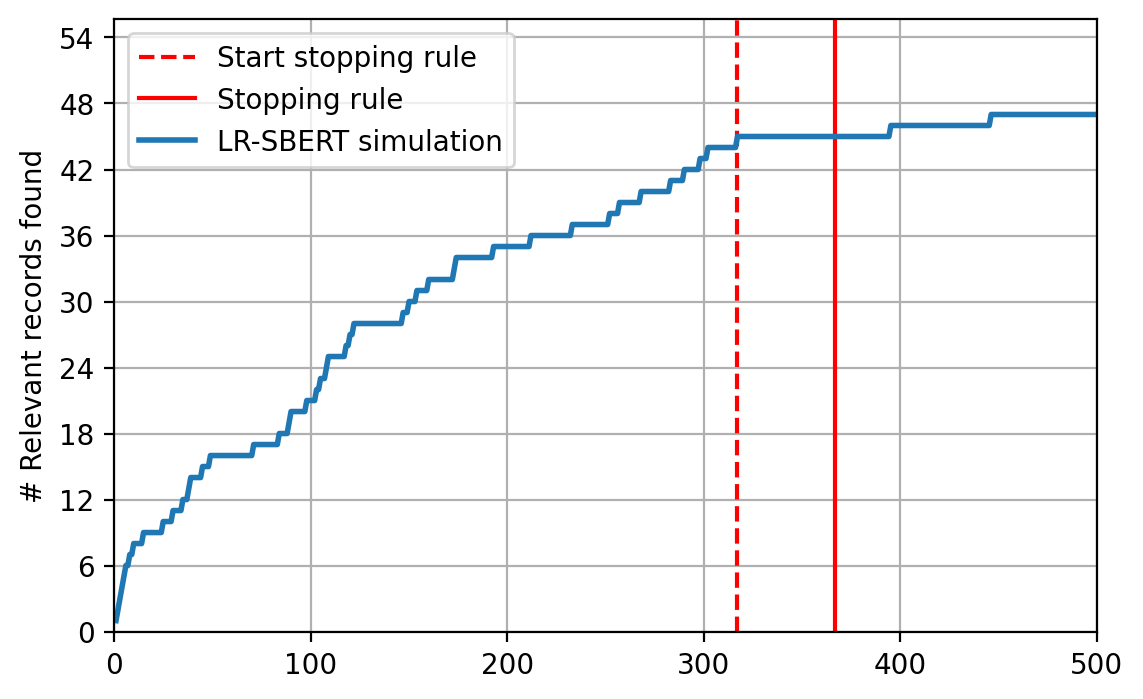

In [70]:
inc_plot = Plot.from_paths([r'simulation_output\lr_sbert.h5']).new("inclusion", result_format="number")
inc_plot.set_grid()
inc_plot.set_xlim(0, 500)
inc_plot.ax.axvline(x=317, color='red', linestyle='--')
inc_plot.ax.axvline(x=317+50, color='red')
inc_plot.ax.legend(["Start stopping rule", "Stopping rule", "LR-SBERT simulation"], loc='upper left')

inc_plot.ax2.remove()
inc_plot.ax3.remove()

inc_plot.fig.set_dpi(200)

inc_plot.save(r"plots\study-4-lr-plot.png")

In [28]:
# Extract all records until stopping rule of 50
file = r'simulation_output\lr_sbert.h5'

f = h5py.File(file, 'r')

stopping_rule = 317+50+1

iteration = f.get(f'results/{stopping_rule}/train_idx')[:]

np.savetxt(f"simulation_states\\lr-records-{stopping_rule}.txt", iteration, fmt='%-10i', newline='')

In [7]:
lr_files = glob.glob(os.path.join(r'simulation_output/LR/', '*.h5'), recursive=False)[:]
lr_files

['simulation_output/LR\\lr_doc2vec.h5',
 'simulation_output/LR\\lr_sbert.h5',
 'simulation_output/LR\\lr_tf-idf.h5',
 'simulation_output/LR\\nb_tf-idf.h5',
 'simulation_output/LR\\nn_doc2vec.h5',
 'simulation_output/LR\\nn_sbert.h5',
 'simulation_output/LR\\power-cnn_wide-doc2vec.h5',
 'simulation_output/LR\\rf_doc2vec.h5',
 'simulation_output/LR\\rf_tf-idf.h5',
 'simulation_output/LR\\svm_tf-idf.h5']

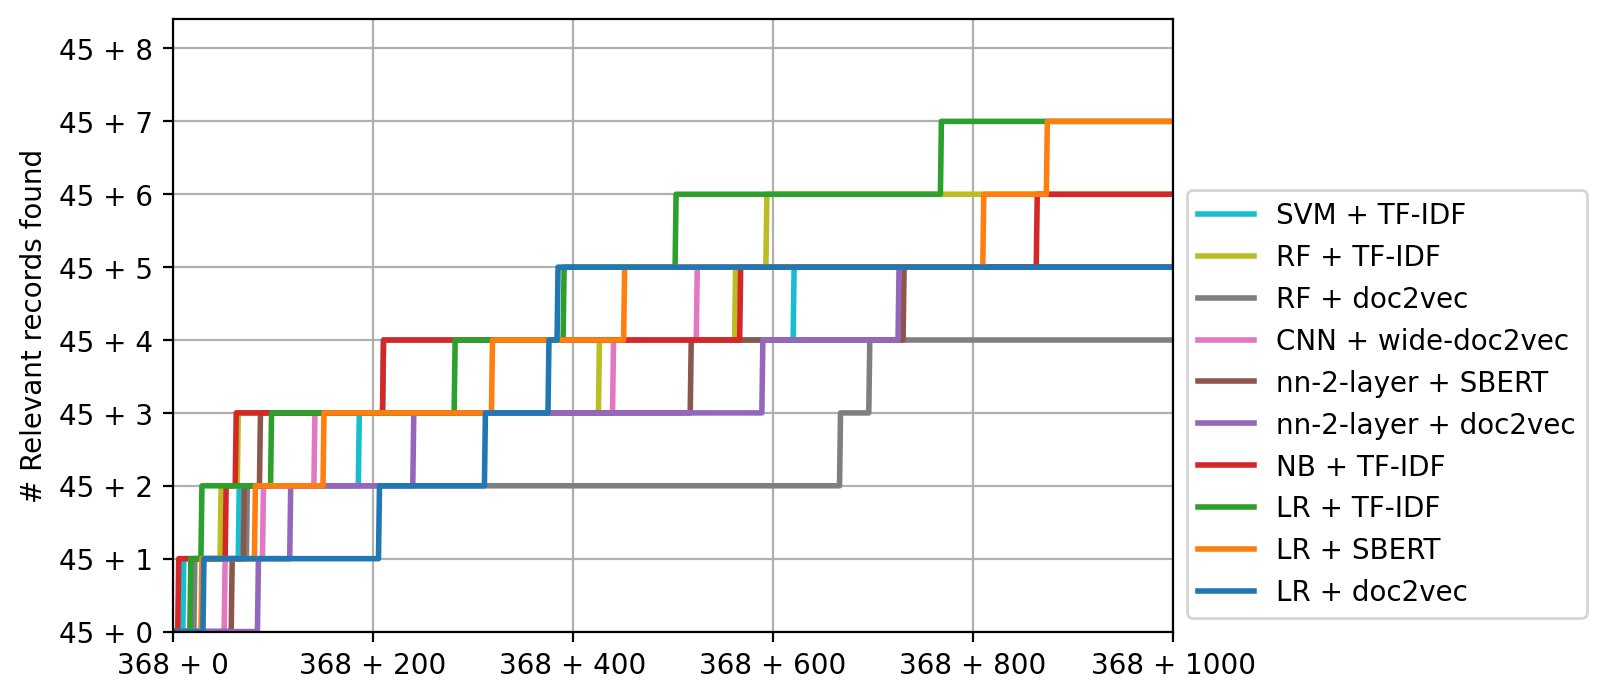

In [9]:
inc_plot = Plot.from_paths(lr_files).new("inclusion", result_format="number")
inc_plot.set_grid()
inc_plot.set_xlim(0, 1000)
inc_plot.ax.legend(["SVM + TF-IDF", "RF + TF-IDF", "RF + doc2vec", "CNN + wide-doc2vec","nn-2-layer + SBERT", "nn-2-layer + doc2vec", "NB + TF-IDF", "LR + TF-IDF", "LR + SBERT","LR + doc2vec"], bbox_to_anchor=(1,0), loc="lower left")

inc_plot.ax2.remove()
inc_plot.ax3.remove()

inc_plot.ax.yaxis.set_major_formatter('45 + {x:1.0f}')
inc_plot.ax.xaxis.set_major_formatter('368 + {x:1.0f}')

inc_plot.fig.set_dpi(200)

inc_plot.show()
inc_plot.save(r"plots\study-4-lr-runs.png")

368 to percentages is 0.7935%, and 45 records were already known

In [11]:
# extract feature matrix training time
print("RRF@1%: ")

for file in lr_files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(1-0.7935, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@1.5%: ")

for file in lr_files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(1.5-0.7935, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@2%: ")

for file in lr_files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(2-0.7935, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

# extract feature matrix training time
print("RRF@3%: ")

for file in lr_files:

    try:
        print(file, " : ", StateStatistics.from_path(file).analysis.rrf(2.8-0.7935, x_format="number")[-1])
    except:
        print(file + ' : ' + 'error')

RRF@1%: 
simulation_output/LR\lr_doc2vec.h5  :  (0, 1.0)
simulation_output/LR\lr_sbert.h5  :  (0, 2.0)
simulation_output/LR\lr_tf-idf.h5  :  (0, 2.0)
simulation_output/LR\nb_tf-idf.h5  :  (0, 3.0)
simulation_output/LR\nn_doc2vec.h5  :  (0, 1.0)
simulation_output/LR\nn_sbert.h5  :  (0, 3.0)
simulation_output/LR\power-cnn_wide-doc2vec.h5  :  (0, 2.0)
simulation_output/LR\rf_doc2vec.h5  :  (0, 2.0)
simulation_output/LR\rf_tf-idf.h5  :  (0, 3.0)
simulation_output/LR\svm_tf-idf.h5  :  (0, 2.0)
RRF@1.5%: 
simulation_output/LR\lr_doc2vec.h5  :  (0, 3.0)
simulation_output/LR\lr_sbert.h5  :  (0, 4.0)
simulation_output/LR\lr_tf-idf.h5  :  (0, 4.0)
simulation_output/LR\nb_tf-idf.h5  :  (0, 4.0)
simulation_output/LR\nn_doc2vec.h5  :  (0, 3.0)
simulation_output/LR\nn_sbert.h5  :  (0, 3.0)
simulation_output/LR\power-cnn_wide-doc2vec.h5  :  (0, 3.0)
simulation_output/LR\rf_doc2vec.h5  :  (0, 2.0)
simulation_output/LR\rf_tf-idf.h5  :  (0, 3.0)
simulation_output/LR\svm_tf-idf.h5  :  (0, 4.0)
RRF@2%: 
s

# Extra - stability correlation graph

In [2]:
# import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import xlsxwriter

In [92]:
results = []

for file in files:
    result = []
    result.append(file)

    for i, number in enumerate(StateStatistics.from_path(file).to_dict()['time_to_discovery']):
        ranking = str(number) + ": " + str(i)
        result.append(ranking)

    # sort result
    result.sort()

    results.append(result)

In [93]:
df = pd.DataFrame(results)

In [94]:
writer = pd.ExcelWriter(r'results\rank_order.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='rank_order', index=False)
writer.save()
writer.close()

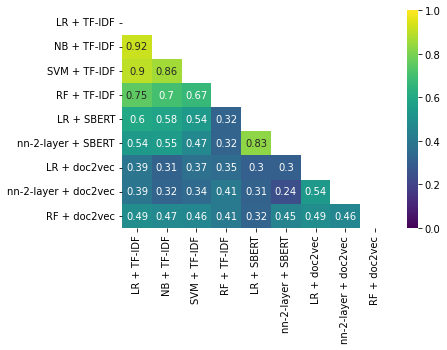

<Figure size 432x288 with 0 Axes>

In [80]:
# calculate correlation matrix for all columns
matrix = data.corr().round(2)

# create a mask for the upper triangle
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Set color map
cmap = cm.viridis

# Set up the matplotlib figure
sns.heatmap(matrix, annot=True, vmax=1, vmin=0, center=0.5, cmap=cmap, mask=mask)
plt.show()

# save plot
plt.savefig(r'plots\corr-heatmap.png')

## average plot

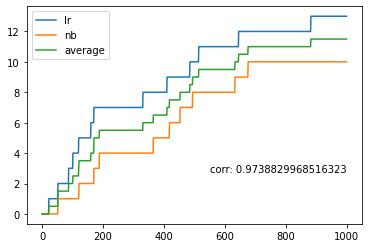

In [5]:
from asreview.analysis import Analysis
import matplotlib.pyplot as plt
import numpy as np

inclusion_values_lr = Analysis.from_path(r'simulation_output\NB\lr_tf-idf.h5').inclusions_found(result_format='number')[1]
inclusion_values_nb = Analysis.from_path(r'simulation_output\NB\nb_tf-idf.h5').inclusions_found(result_format='number')[1]

# plot inclusion values for lr and nb
plt.plot(inclusion_values_lr, label='lr')
plt.plot(inclusion_values_nb, label='nb')

# calculate correlation
corr = np.corrcoef(inclusion_values_lr, inclusion_values_nb)[0,1]

# plot correlation
plt.text(3/4, 1/4, f"corr: {corr}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# calculate average line of lr and nb
average = np.average(np.array([inclusion_values_lr, inclusion_values_nb]), axis=0)

# plot average line
plt.plot(average, label='average')

# add a grid
# plt.grid()

# add legend
plt.legend()

# show plot
plt.show()